[25, 34, 22, 27, 33, 33, 31, 22, 35, 34, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38, 43, 51, 46]
[[43.2 16.7]
 [29.6 66.8]
 [55.1 46.1]]


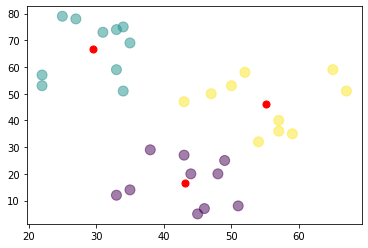

In [4]:
from pandas import DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
 
print (Data["x"])
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=3,n_init=30).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=100, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [1]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [2]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [5]:
import random
i_centroid = random.sample(range(0, len(df)), 3)
print(i_centroid)

[11, 22, 12]


In [6]:
initial_centroids = []
points_array = np.array(df)
for i in i_centroid:
    initial_centroids.append(points_array[i])
initial_centroids

[array([54, 32]), array([35, 14]), array([57, 40])]

In [7]:
centroids = findClosestCentroids(initial_centroids, points_array)

In [16]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]


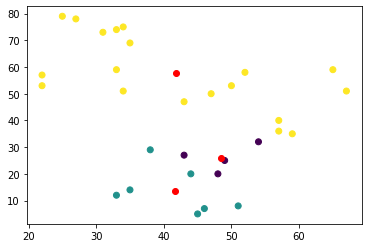

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]


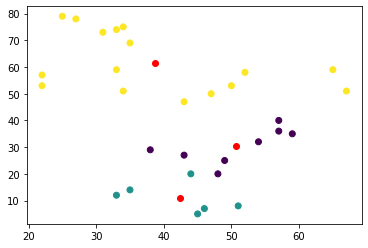

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]


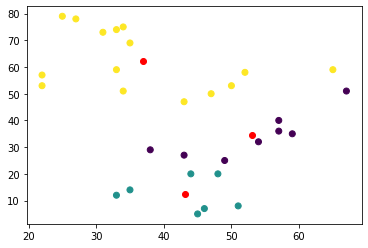

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]


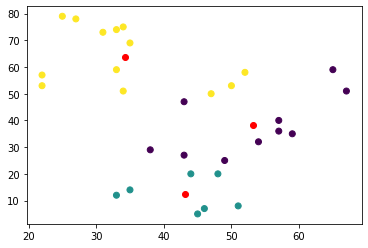

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


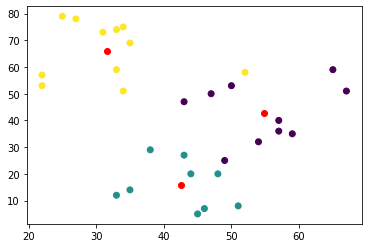

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


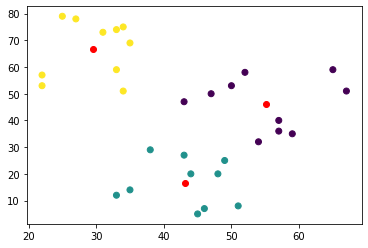

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


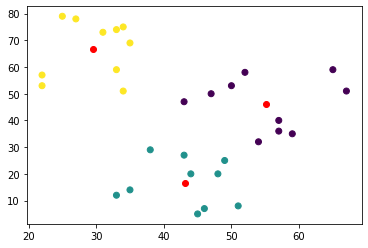

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


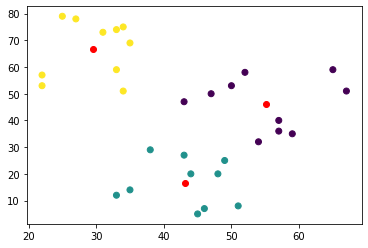

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


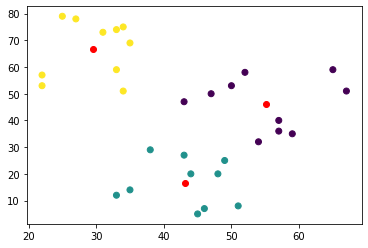

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


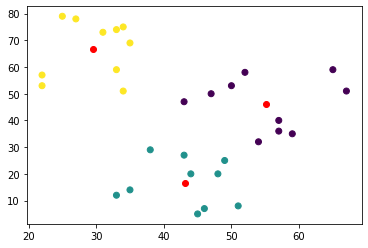

In [18]:
centroids = initial_centroids
for i in range(10):
    get_centroids = findClosestCentroids(centroids,points_array )
    centroids = calc_centroids(get_centroids, points_array )
    print(get_centroids)
    plt.figure()
    plt.scatter(points_array[:, 0], points_array[:, 1],c=get_centroids)
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='red')
    plt.show()